# Building Ages and Size Analysis

The analysis in this notebook is based on the PLUTO dataset, which consists of information on buildings in New York City
(https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). A disclaimer on that page lets us know that dataset may not be 100% accurate and may have missing data, although it is close. I double checked some of the Brownsville addresses for accuracy and to check if alternate addresses were used in the PLUTO dataset, doing Google searches and using a few property sites as a reference (propertyshark, addressreport, zillow, etc). 

-------------

# NYC

A short analysis of New York City buildings, looking at average age, size, number of floors and number of units. Buildings in NYC are not the central focus of this notebook, but it would be good to have an idea of this information to compare with buildings in the Brownsville area that are of interest. 

In [1]:
#loading up necesary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
pluto = pd.read_csv("pluto_21v2.csv")
pluto

C:\Users\miss_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (19,20,22,24,26,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BX,4660,34,212.0,380.00,NaN,11.0,12.0,10467.0,E062,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.877873,-73.863604,NaN
1,MN,445,54,103.0,38.00,4000.0,1.0,2.0,10003.0,E028,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.725333,-73.988711,NaN
2,MN,467,55,103.0,40.00,2000.0,1.0,2.0,10003.0,L003,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.731190,-73.987722,NaN
3,BK,2621,7501,301.0,573.00,3003.0,14.0,33.0,11222.0,E238,...,3.026210e+09,1/23/2008,1,NaN,NaN,21v2,NaN,40.726484,-73.951001,NaN
4,MN,1970,58,109.0,213.03,1001.0,5.0,9.0,10027.0,E080,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.817053,-73.952741,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858208,SI,5016,55,503.0,132.04,NaN,31.0,51.0,10306.0,E162,...,NaN,NaN,3,NaN,NaN,21v2,NaN,40.557440,-74.137239,NaN
858209,SI,3571,63,502.0,114.02,NaN,31.0,50.0,10306.0,E159,...,NaN,NaN,3,NaN,1.0,21v2,NaN,40.581080,-74.103509,NaN
858210,BK,7690,206,315.0,642.00,NaN,22.0,45.0,11229.0,E276,...,NaN,NaN,3,NaN,NaN,21v2,NaN,40.612185,-73.944649,NaN
858211,MN,2105,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,1.0,1.0,21v2,NaN,40.828169,-73.933870,NaN


In [3]:
len(pluto)

858213

In [4]:
pluto.isna

<bound method DataFrame.isna of        borough  block   lot     cd  ct2010  cb2010  schooldist  council  \
0           BX   4660    34  212.0  380.00     NaN        11.0     12.0   
1           MN    445    54  103.0   38.00  4000.0         1.0      2.0   
2           MN    467    55  103.0   40.00  2000.0         1.0      2.0   
3           BK   2621  7501  301.0  573.00  3003.0        14.0     33.0   
4           MN   1970    58  109.0  213.03  1001.0         5.0      9.0   
...        ...    ...   ...    ...     ...     ...         ...      ...   
858208      SI   5016    55  503.0  132.04     NaN        31.0     51.0   
858209      SI   3571    63  502.0  114.02     NaN        31.0     50.0   
858210      BK   7690   206  315.0  642.00     NaN        22.0     45.0   
858211      MN   2105   450    NaN     NaN     NaN         NaN      NaN   
858212      MN   2156    44  112.0  269.00     NaN         6.0     10.0   

        zipcode firecomp  ...        appbbl    appdate  plutomapid 

In [5]:
pluto.fillna(value=0, inplace=True)

I filled the NA values (with 0), because dropping them affected the data in a way that made analyzing dificult

In [6]:
pluto["bldgarea"].mean()

6504.289891903292

In [7]:
pluto["yearbuilt"].mean()

1846.0182646965263

This mean year of buildings being built is interesting, as a search on Statista reveals that the average building age in NYC is 53 years old (as of 2014). 

In [8]:
pluto["yearbuilt"]

0            0.0
1         1999.0
2         1920.0
3         2007.0
4         1901.0
           ...  
858208       0.0
858209       0.0
858210       0.0
858211       0.0
858212       0.0
Name: yearbuilt, Length: 858213, dtype: float64

In [9]:
pluto["numfloors"].mean()

2.3384276164540303

In [10]:
pluto["unitsres"].mean()

4.188058209325657

So our information for NYC buildings is: <br>

Average building area: 6504 sqr feet<br>

Average year buildings were built: 1846<br>

Average number of floors: 2.33 floors<br>

Average number of residential units per building: 4.1 units

Text(0.5, 0, 'Years Built')

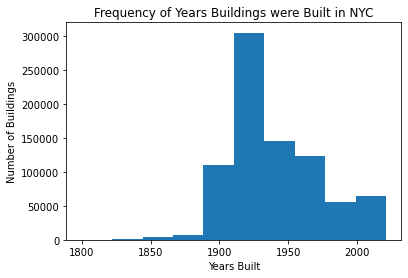

In [11]:
pluto['yearbuilt'].plot(kind='hist',range=(1800,2021), bins=10)
plt.title("Frequency of Years Buildings were Built in NYC")
plt.ylabel("Number of Buildings")
plt.xlabel("Years Built")

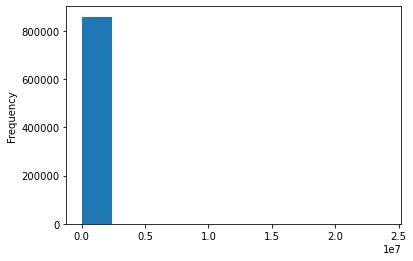

In [12]:
pluto['bldgarea'].plot(kind='hist')

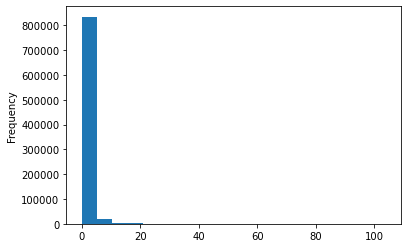

In [13]:
pluto['numfloors'].plot(kind='hist', bins = 20)

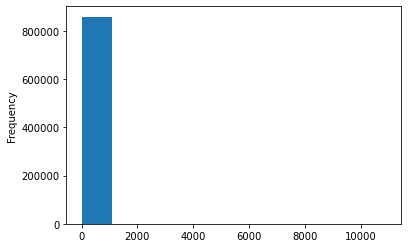

In [14]:
pluto['unitsres'].plot(kind='hist')

-----------------

----------------

# Brownsville Complaints Buildings

In this section, I will look at the ages and sizes of buildings in Brownsville. These buildings are the ones with the most complaints, violations and "No Access" status descriptions, as seen in my other analysis (Brownsville.csv analysis and visualizations). There are 26 total addresses that are in this version of the data.<br>
<br>
While searching for these addresses in the dataset, I ran into some issues. First is that a few of these (1711 Fulton Avenue and 210 Lott Avenue) are on the PLUTO data set, but under diffrent addresses due to them being part of complexes. There are two more addresses (351 Legion Street and 37 Lots New Avenue) that don't appear in the dataset at all.<br>
<br>
Alternate Addresses:<br>
1711 Fulton Avenue - 88 Chauncey Street<br>
210 Lott Avenue - 187 Hegeman Avenue


In [15]:
pluto_topbk16 = pd.read_csv("pluto_brownsvilleanalysis.csv")
pluto_topbk16

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude
0,BK,1691,12,303,297.00,2003,16,36,11233,L111,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.679861,-73.929717
1,BK,3621,1,316,896.00,2002,23,42,11212,E257,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.656021,-73.911614
2,BK,1568,12,316,369.00,2002,23,37,11233,L176,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.677032,-73.910562
3,BK,4632,6,317,892.00,3001,18,41,11212,E283,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.662364,-73.922015
4,BK,4632,25,317,892.00,3001,18,41,11212,E283,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.661493,-73.921043
5,BK,1439,4,316,303.00,3001,16,41,11233,L176,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.675509,-73.919058
6,BK,4615,6,317,892.00,2001,17,41,11212,E283,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.664004,-73.923833
7,BK,4632,11,317,892.00,3001,18,41,11212,E283,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.662108,-73.921730
8,BK,3628,1,316,920.00,2002,23,42,11212,E257,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.657616,-73.904645
9,BK,4648,59,317,886.00,1002,18,41,11212,L174,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.658115,-73.921739


In [16]:
pluto_topbk16.fillna(value=0, inplace=True)

In [17]:
pluto_topbk16["bldgarea"].mean()

55437.416666666664

In [18]:
pluto_topbk16["yearbuilt"].mean()

1929.0416666666667

In [19]:
pluto_topbk16["yearbuilt"]

0     1974
1     1948
2     1924
3     1927
4     1929
5     1910
6     1926
7     1929
8     1969
9     1931
10    1956
11    1949
12    1927
13    1930
14    1910
15    1930
16    1930
17    1891
18    1930
19    1910
20    1930
21    1928
22    1910
23    1899
Name: yearbuilt, dtype: int64

In [20]:
pluto_topbk16["numfloors"].mean()

4.916666666666667

In [21]:
pluto_topbk16["unitsres"].mean()

67.08333333333333

So our information for NYC buildings is: <br>

Average building area: 55,437 sqr feet<br>

Average year buildings were built: 1929<br>

Average number of floors: 4.9 floors<br>

Average number of residential units per building: 67 units

Text(0.5, 0, 'Years Built')

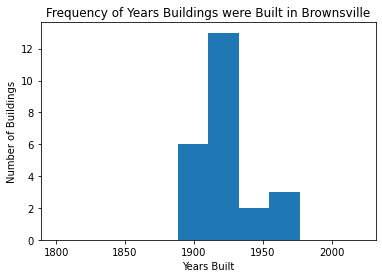

In [22]:
pluto_topbk16['yearbuilt'].plot(kind='hist',range=(1800,2021))
plt.title("Frequency of Years Buildings were Built in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Years Built")

Text(0.5, 0, 'Building Square Feet')

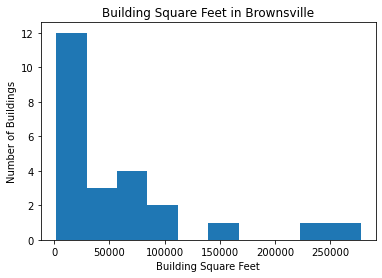

In [23]:
pluto_topbk16['bldgarea'].plot(kind='hist')
plt.title("Building Square Feet in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Building Square Feet")

Text(0.5, 0, 'Number of Floors in Building')

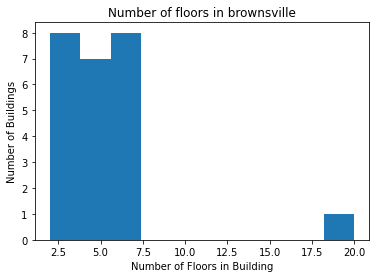

In [24]:
pluto_topbk16['numfloors'].plot(kind='hist')
plt.title("Number of floors in brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Floors in Building")

Text(0.5, 0, 'Number of Residential Units')

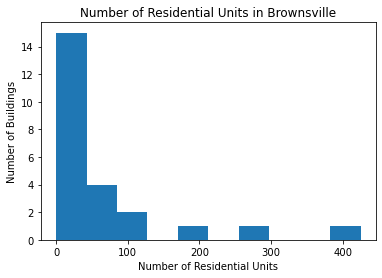

In [25]:
pluto_topbk16['unitsres'].plot(kind='hist')
plt.title("Number of Residential Units in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Residential Units")

So far, my findings are:<br>
-The building with the latest year built is 88 Chauncey Street (aka 1711 Fulton Avenue), which was built in 1974. This address happens to be the one that is most commonly in the top spot in complaints/violations/no access within the three time frames explored. <br>
-The oldest building is 437 Macon Street, which was built in 1891. This building is also one of the smallest in the data, comprised of only 1 building, 3 floors and 2 residential units.<br>
-